In [3]:
import datetime as datetime

In [4]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas_datareader as pdr

In [6]:
import numpy as np

In [48]:
#Importing Data 

start = datetime.datetime (1950, 1, 1)
end = datetime.datetime (2019, 10, 1)

fred_gdp = pdr.DataReader(['GDPC1'], 'fred', start, end)

fred_gdp.tail(12)

,GDPC1
DATE,
2017-01-01,17896.623
2017-04-01,17996.802
2017-07-01,18126.226
2017-10-01,18296.685
2018-01-01,18436.262
2018-04-01,18590.004
2018-07-01,18679.599
2018-10-01,18721.281
2019-01-01,18833.195


In [46]:
#adding natural logs to data

fred_gdp['Natural Logs'] = np.log2(fred_gdp['GDPC1'])


print(fred_gdp)

                GDPC1  Natural Logs
DATE                               
1950-01-01   2186.365     11.094319
1950-04-01   2253.045     11.137660
1950-07-01   2340.112     11.192362
1950-10-01   2384.920     11.219725
1951-01-01   2417.311     11.239187
...               ...           ...
2018-10-01  18721.281     14.192392
2019-01-01  18833.195     14.200990
2019-04-01  18982.528     14.212385
2019-07-01  19112.653     14.222240
2019-10-01  19202.310     14.228992

[280 rows x 2 columns]


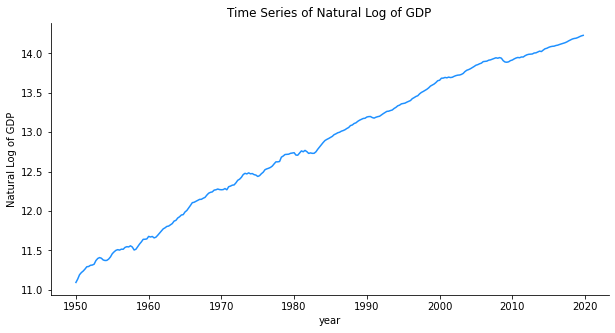

In [47]:
#Graph for Natural Log... having trouble figuring out how to add trendline... unweighted MA? Lagged values? help.

import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(fred_gdp.index, fred_gdp['Natural Logs'],color = 'dodgerblue')

ax.set_title('Time Series of Natural Log of GDP')
ax.set_ylabel('Natural Log of GDP')
ax.set_xlabel('year')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


In [49]:
# B. Compute a point forecast and 95% interval forecast of the log of GDP for each quarter
#over the period 2020:I to 2026:IV. Plot and report these forecasts along with actual
#GDP in a time series graph.

from sklearn.ensemble import GradientBoostingRegressor
# Set lower and upper quantile
LOWER_ALPHA = 0.05
UPPER_ALPHA = 0.95

# Each model has to be separate
lower_model = GradientBoostingRegressor(loss="quantile",                   
                                        alpha=LOWER_ALPHA)
# The mid model will use the default loss
mid_model = GradientBoostingRegressor(loss="ls")
upper_model = GradientBoostingRegressor(loss="quantile",
                                        alpha=UPPER_ALPHA)



KeyError: 'actual'